In [68]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.preprocessing import StandardScaler

In [161]:
data = pd.read_csv('~/Galvanize/analytics-capstone/data/spotify_data.csv')

In [162]:
data.head()




,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,popularity
0,0,0.05550,https://api.spotify.com/v1/audio-analysis/3Wib...,0.746,304227,0.978,3WibbMr6canxRJXhNtAvLU,0.000040,9,0.0260,-5.324,1,0.0978,153.897,4,https://api.spotify.com/v1/tracks/3WibbMr6canx...,audio_features,spotify:track:3WibbMr6canxRJXhNtAvLU,0.652,61
1,1,0.14800,https://api.spotify.com/v1/audio-analysis/2Ud3...,0.701,462267,0.788,2Ud3deeqLAG988pfW0Kwcl,0.625000,2,0.0977,-5.611,1,0.0425,142.584,4,https://api.spotify.com/v1/tracks/2Ud3deeqLAG9...,audio_features,spotify:track:2Ud3deeqLAG988pfW0Kwcl,0.795,61
2,2,0.02600,https://api.spotify.com/v1/audio-analysis/6Rzg...,0.447,225160,0.868,6RzgLIPAL0ikigYa3ufujc,0.000003,2,0.7300,-4.875,1,0.2340,85.873,4,https://api.spotify.com/v1/tracks/6RzgLIPAL0ik...,audio_features,spotify:track:6RzgLIPAL0ikigYa3ufujc,0.420,44
3,3,0.00249,https://api.spotify.com/v1/audio-analysis/5IVu...,0.646,236133,0.770,5IVuqXILoxVWvWEPm82Jxr,0.000000,2,0.0715,-6.596,0,0.2260,99.165,4,https://api.spotify.com/v1/tracks/5IVuqXILoxVW...,audio_features,spotify:track:5IVuqXILoxVWvWEPm82Jxr,0.681,78
4,4,0.01930,https://api.spotify.com/v1/audio-analysis/0DiW...,0.611,320357,0.697,0DiWol3AO6WpXZgp0goxAV,0.000000,2,0.3320,-8.618,1,0.1330,122.752,4,https://api.spotify.com/v1/tracks/0DiWol3AO6Wp...,audio_features,spotify:track:0DiWol3AO6WpXZgp0goxAV,0.476,75


In [163]:
data.shape


(2535, 20)

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 20 columns):
Unnamed: 0          2535 non-null int64
acousticness        2535 non-null float64
analysis_url        2535 non-null object
danceability        2535 non-null float64
duration_ms         2535 non-null int64
energy              2535 non-null float64
id                  2535 non-null object
instrumentalness    2535 non-null float64
key                 2535 non-null int64
liveness            2535 non-null float64
loudness            2535 non-null float64
mode                2535 non-null int64
speechiness         2535 non-null float64
tempo               2535 non-null float64
time_signature      2535 non-null int64
track_href          2535 non-null object
type                2535 non-null object
uri                 2535 non-null object
valence             2535 non-null float64
popularity          2535 non-null int64
dtypes: float64(9), int64(6), object(5)
memory usage: 396.2+ KB


In [165]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,2535.000000,2535.000000,2535.000000,2.535000e+03,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000
mean,291.898619,0.228151,0.598286,2.712393e+05,0.667125,0.165190,5.312032,0.180037,-8.096333,0.611834,0.086367,120.149125,3.942801,0.531873,38.189349
std,270.734861,0.272079,0.172141,1.375453e+05,0.195525,0.305357,3.627059,0.146638,4.024164,0.487429,0.085885,26.209759,0.332830,0.244126,29.192643
min,0.000000,0.000002,0.076600,3.997300e+04,0.024200,0.000000,0.000000,0.009970,-29.986000,0.000000,0.022800,60.684000,1.000000,0.028400,0.000000
25%,72.000000,0.020900,0.485000,2.022630e+05,0.549500,0.000000,2.000000,0.088800,-10.219500,0.000000,0.037350,100.007000,4.000000,0.350000,10.000000
50%,203.000000,0.103000,0.617000,2.339020e+05,0.693000,0.000245,5.000000,0.120000,-7.074000,1.000000,0.052000,119.983000,4.000000,0.541000,35.000000
75%,414.000000,0.349000,0.726500,2.919465e+05,0.820000,0.117000,8.000000,0.228500,-5.189000,1.000000,0.090400,133.952500,4.000000,0.730000,67.000000
max,1009.000000,0.995000,0.967000,1.967427e+06,0.999000,0.996000,11.000000,0.984000,0.485000,1.000000,0.792000,210.002000,5.000000,0.977000,99.000000


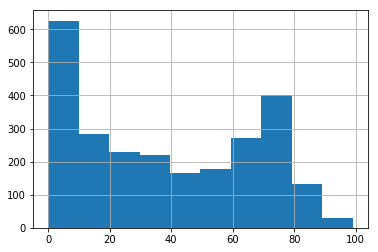

In [166]:
data['popularity'].hist()

In [167]:
(data['popularity'] < 1).sum()


336

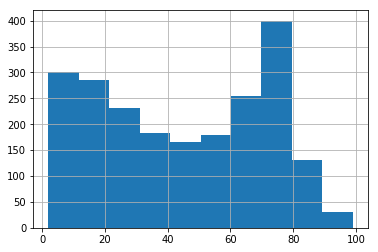

In [168]:
drop_zeros = data[data['popularity'] > 1]
drop_zeros['popularity'].hist()

### Get Features + Targets


In [228]:
X = drop_zeros[['acousticness', 'danceability',
       'duration_ms', 'energy','instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence']]
y = drop_zeros['popularity']

In [229]:
X.shape, y.shape



((2162, 13), (2162,))

In [230]:
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.05550,0.746,304227,0.978,0.000040,9,0.0260,-5.324,1,0.0978,153.897,4,0.652
1,0.14800,0.701,462267,0.788,0.625000,2,0.0977,-5.611,1,0.0425,142.584,4,0.795
2,0.02600,0.447,225160,0.868,0.000003,2,0.7300,-4.875,1,0.2340,85.873,4,0.420
3,0.00249,0.646,236133,0.770,0.000000,2,0.0715,-6.596,0,0.2260,99.165,4,0.681
4,0.01930,0.611,320357,0.697,0.000000,2,0.3320,-8.618,1,0.1330,122.752,4,0.476


In [231]:
X.nunique()

acousticness        1343
danceability         648
duration_ms         1942
energy               703
instrumentalness    1157
key                   12
liveness             811
loudness            1864
mode                   2
speechiness          818
tempo               1986
time_signature         4
valence              851
dtype: int64

In [255]:
X.shape

(2162, 25)

In [233]:
keys = pd.get_dummies(X['key'])

In [234]:
keys.columns


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [235]:
X = pd.concat([X, keys], axis=1)

In [237]:
X.columns

Index([    'acousticness',     'danceability',      'duration_ms',
                 'energy', 'instrumentalness',              'key',
               'liveness',         'loudness',             'mode',
            'speechiness',            'tempo',   'time_signature',
                'valence',                  0,                  1,
                        2,                  3,                  4,
                        5,                  6,                  7,
                        8,                  9,                 10,
                       11],
      dtype='object')

In [265]:
mode = pd.get_dummies(X['mode'])

In [268]:
mode = mode.rename(columns=({0: "is_minor", 1: "is_major"}))

In [270]:
X = pd.concat([X, mode], axis=1)

In [98]:
time_sig = pd.get_dummies(X['time_signature'])

In [283]:
time_sig = time_sig.rename(index = int, columns={1: "time_sig_1", 3: "time_sig_3", 4: "time_sig_4", 5:"time_sig_5"})

In [284]:
time_sig.index

Int64Index([   0,    1,    2,    3,    4,    6,    7,    8,    9,   11,
            ...
            2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534],
           dtype='int64', length=2162)

In [286]:
X = pd.concat([X, time_sig], axis=1)


In [288]:
X.shape

(2162, 31)

In [293]:
## Make a DataFrame for Plotting Purposes

In [295]:
dataframe = pd.DataFrame(X)

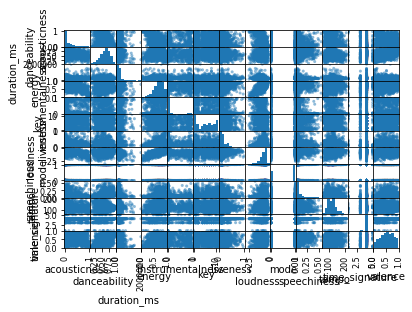

In [303]:
pd.plotting.scatter_matrix(dataframe[['acousticness', 'danceability',
       'duration_ms', 'energy','instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence']]);

NameError: name 'count' is not defined

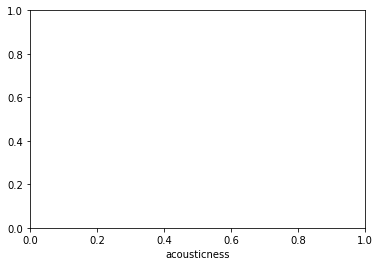

In [320]:
for i in dataframe[['acousticness', 'danceability',
       'duration_ms', 'energy','instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence']]: 
    plt.xlabel(i)
    plt.ylabel(count)
    plt.hist(dataframe[i])
    plt.show()

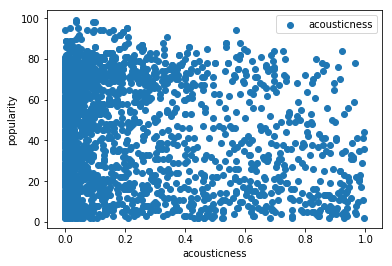

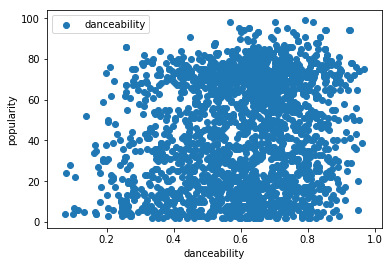

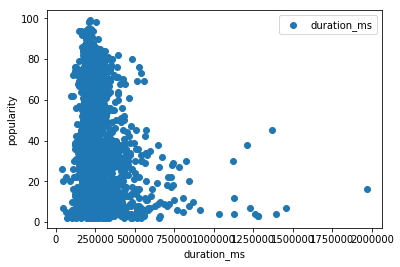

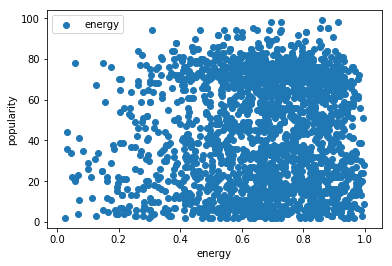

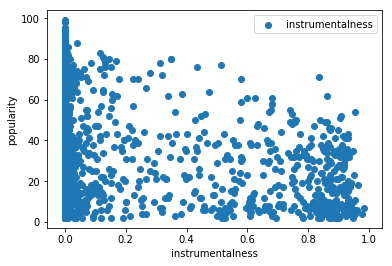

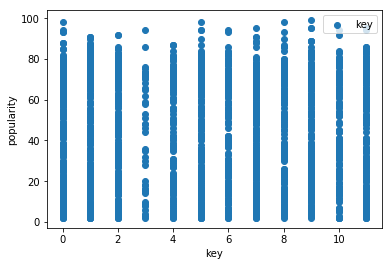

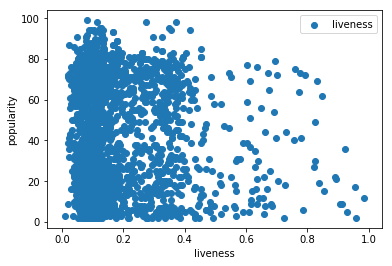

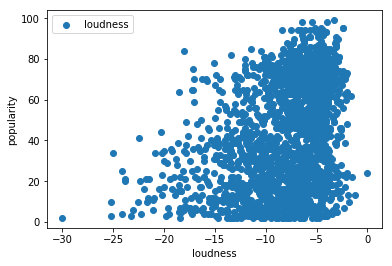

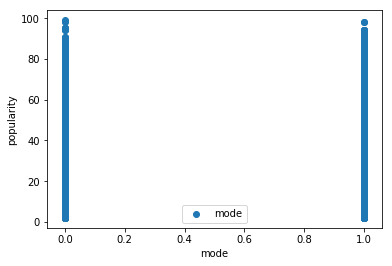

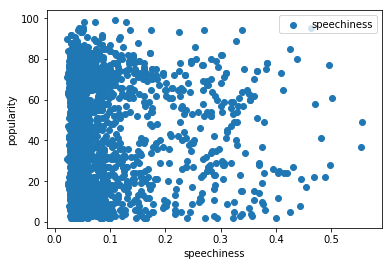

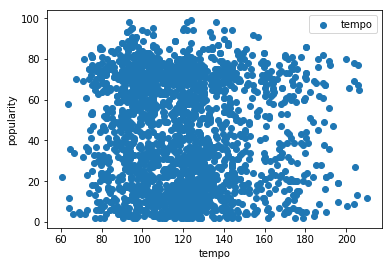

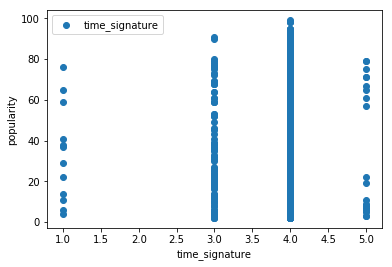

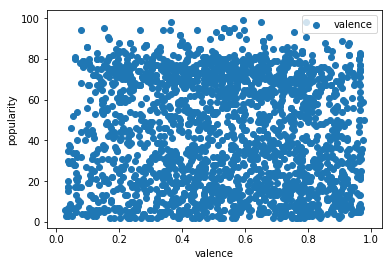

In [316]:
for i in dataframe[['acousticness', 'danceability',
       'duration_ms', 'energy','instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence']]: 
    plt.scatter(dataframe[i], y, label=i)
    plt.xlabel(i)
    plt.ylabel('popularity')
    plt.legend()
    plt.show()

### Standardize Data

In [289]:
scalar = StandardScaler()

In [290]:
scaled_data = scalar.fit_transform(X)